In [4]:
import numpy as np
from scipy.interpolate import interp1d,krogh_interpolate,CubicSpline
import matplotlib.pyplot as plt
import scipy.special as special

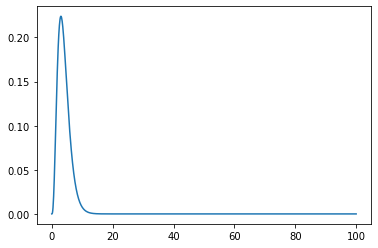

In [12]:
##Gamma distributions
from scipy.stats import gamma
x=np.linspace(0,100,1000)
pdf=gamma.pdf(x,a=4)
plt.plot(x,pdf)

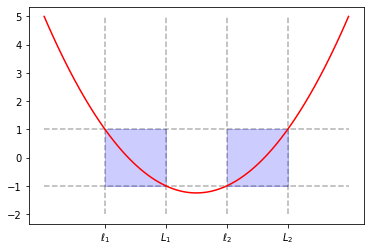

In [29]:
##$\sigma_2$ from (Goujaud, 2021)

l1,L1=2,4
l2,L2=6,8
rho=(L2+l1)/(L2-l1)
R=(l2-L1)/(L2-l1)
m=((np.sqrt(rho**2-R**2)-np.sqrt(rho**2-1))/np.sqrt(1-R**2))**2
sigma= lambda x: 2*(((1+m)/2/np.sqrt(m))**2)*(1-x/L1)*(1-x/l2)-1


x=np.linspace(0,10,100)
plt.plot(x,sigma(x),c='r')
plt.hlines([-1,1],0,10,linestyles='dashed',color='k',alpha=0.3)
plt.fill_between(np.linspace(l1,L1),-1,1,alpha=0.2,color='b')
plt.fill_between(np.linspace(l2,L2),-1,1,alpha=0.2,color='b')
plt.xticks([l1,L1,l2,L2],[r'$\ell_1$',r'$L_1$',r'$\ell_2$',r'$L_2$'])
plt.vlines([l1,L1,l2,L2],-2,5,linestyles='dashed',color='k',alpha=0.3)

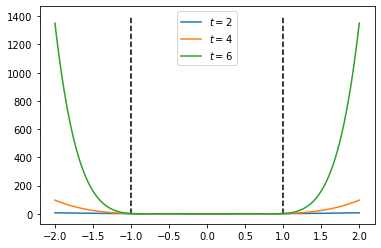

In [10]:
## chebyshev polynomials

x=np.linspace(-2,2,100)
for t in np.arange(2,8,2):
    y=special.eval_chebyt(t,x)
    plt.plot(x,y,label=r'$t= %s$' %(t))
plt.vlines([-1,1],0,1400,linestyles='dashed',color='k')
plt.legend()

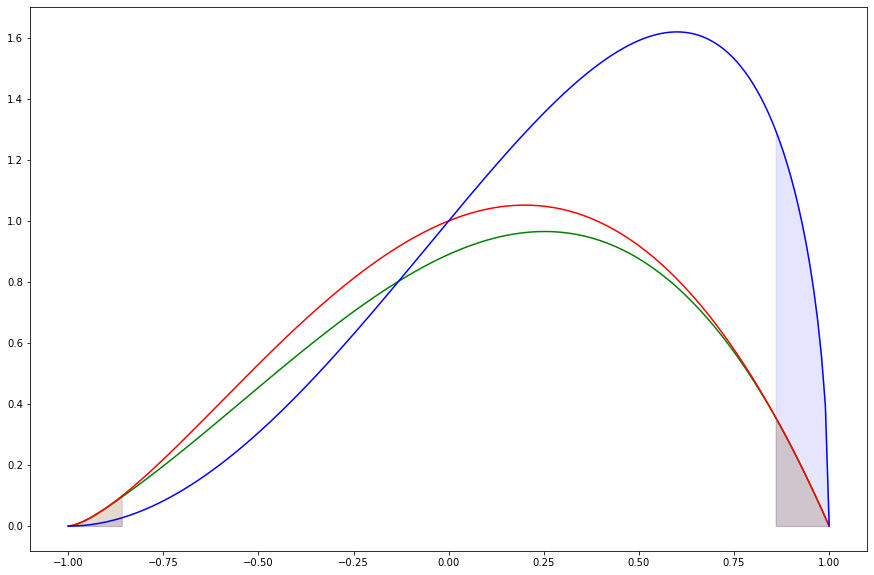

In [21]:

eps=1e-6
area_idx=10 ##actually interpolate index
true_area_idx=15
t=np.linspace(-1+eps,1-eps,200,endpoint=True)
y1=((1-t)**0.5)*((1+t)**(2))
y2=((1-t)**1.0)*((1+t)**(1.5))

t2=np.concatenate((t[:area_idx],t[-area_idx:]))

y3=((1-t2)**1.0)*((1+t2)**(1.5))
#f=interp1d(t2,y3)
f=CubicSpline(t2,y3)
y3=f(t)
#y3=barycentric_interpolate(t2,y3,t)

plt.figure(figsize=(15,10))
c1,c2,c3='b','r','g'
plt.plot(t,y3,c=c3)
plt.plot(t,y2,c=c2)
plt.plot(t,y1,c=c1)
alpha=0.1
plt.fill_between(t[:true_area_idx],y1[:true_area_idx],color=c1,alpha=alpha)
plt.fill_between(t[-true_area_idx:],y1[-true_area_idx:],color=c1,alpha=alpha)

plt.fill_between(t[:true_area_idx],y2[:true_area_idx],color=c2,alpha=alpha)
plt.fill_between(t[-true_area_idx:],y2[-true_area_idx:],color=c2,alpha=alpha)

plt.fill_between(t[:true_area_idx],y3[:true_area_idx],color=c3,alpha=alpha)
plt.fill_between(t[-true_area_idx:],y3[-true_area_idx:],color=c3,alpha=alpha)




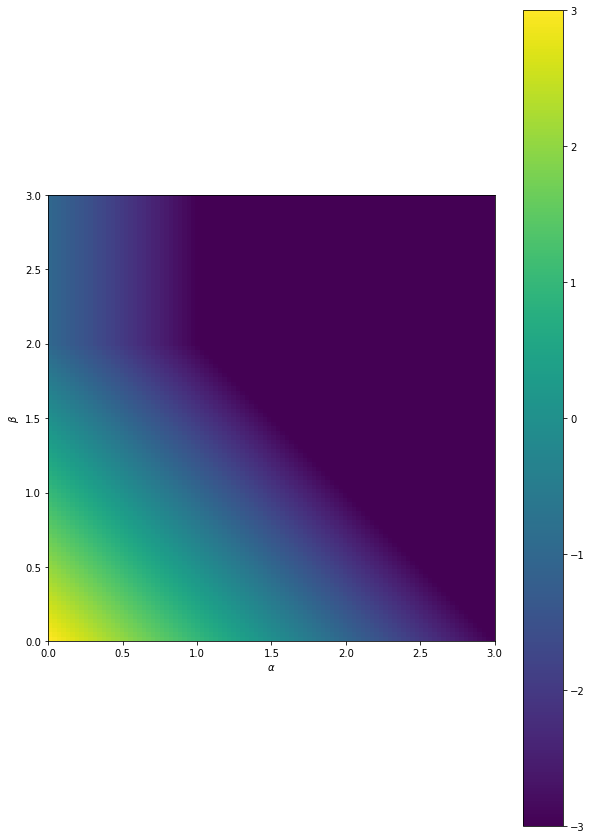

In [18]:
def rates(xi,tau,alpha,beta):
    if alpha<tau+1/2 and beta<xi+1/2:
        return -1-2*beta
    if alpha==tau+1/2 and beta==xi+1/2:
        return -2*(xi+1)
    return 2*(max(alpha-beta-tau,-xi)-1)

plt.figure(figsize=(10,15))

N,M=100,100
xi,tau=1/2,0.5
alpha_axis=np.linspace(0,3,N)
beta_axis=np.linspace(0,3.0,M)
im=np.zeros((N,M))
extent=[beta_axis[0],beta_axis[-1],alpha_axis[0],alpha_axis[-1]]
for i in range(N):
    for j in range(M):
        im[i,j]=rates(xi,tau,alpha_axis[i],beta_axis[j])
plt.imshow(im,interpolation='nearest',extent=extent)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.colorbar()


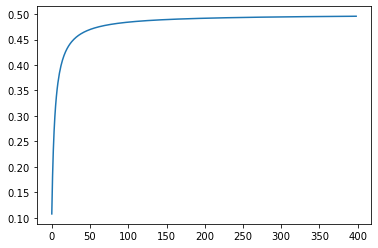

In [51]:
##checking norm of the standard jacobi polynomials
##done in log scale for numerical stability reasons

from scipy.special import loggamma
t=np.arange(1,400)
alpha=1/2,
beta=5/2
logrates=loggamma(t+alpha+1)+loggamma(t+beta+1)
logrates=logrates-loggamma(t)-loggamma(t+alpha+beta+1)
logrates-=np.log(2*t+alpha+beta+1)

plt.plot(np.exp(logrates))

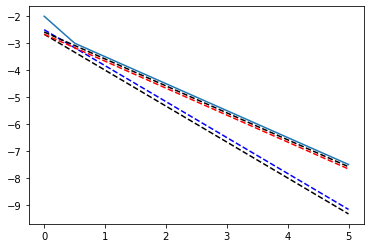

In [15]:

def nesterates(xi):
    if xi>1/2:
        return -(xi+5/2)
    return -2*(xi+1)
xis=np.linspace(0,5,100)

l1=-4/3*(xis+2)
l2=-30/12 -4/3*xis
l3=-(xis+8/3)
l4=-(xis+31/12)

plt.plot(xis,l1,'--',c='k')

plt.plot(xis,l2,'--',c='b')

plt.plot(xis,l3,'--',c='r')

plt.plot(xis,l4,'--',c='k')
plt.plot(xis,[nesterates(t) for t in xis])